In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import itertools
from scipy.stats import pearsonr, spearmanr
from IPython.display import display

In [2]:
cleaned_dfs = []
for df, setting, dataset in zip(
    [
        pd.read_csv("/root/similaritybench/experiments/results/nlp_aug_sst2.csv"),
        pd.read_csv("/root/similaritybench/experiments/results/nlp_mem_sst2.csv"),
        pd.read_csv("/root/similaritybench/experiments/results/nlp_shortcut_sst2.csv"),
        pd.read_csv("/root/similaritybench/experiments/results/nlp_shortcut_mnli.csv")
    ],
    ["aug", "mem", "sc", "sc"],
    ["sst2", "sst2", "sst2", "mnli"]
):
    data = df.loc[2:].copy().reset_index(drop=True)
    data.columns = ["Similarity Measure", "Violation Rate", "AUPRC"]
    data["Architecture"] = "BERT-L"
    data.loc[:, "Violation Rate"] = data.loc[:, "Violation Rate"].astype(float)
    data.loc[:, "AUPRC"] = data.loc[:, "AUPRC"].astype(float)
    data = data.melt(
        id_vars=["Similarity Measure", "Architecture"],
        value_vars=["Violation Rate", "AUPRC"],
        var_name="Quality Metric",
        value_name="Score",
    )
    data["Setting"] = setting
    data["Dataset"] = dataset

    cleaned_dfs.append(data)

data = pd.concat(cleaned_dfs).reset_index(drop=True)
data.head()

,Similarity Measure,Architecture,Quality Metric,Score,Setting,Dataset
0,AlignedCosineSimilarity,BERT-L,Violation Rate,0.408722,aug,sst2
1,CKA,BERT-L,Violation Rate,0.342889,aug,sst2
2,ConcentricityDifference,BERT-L,Violation Rate,0.467389,aug,sst2
3,DistanceCorrelation,BERT-L,Violation Rate,0.345522,aug,sst2
4,EigenspaceOverlapScore,BERT-L,Violation Rate,0.516689,aug,sst2


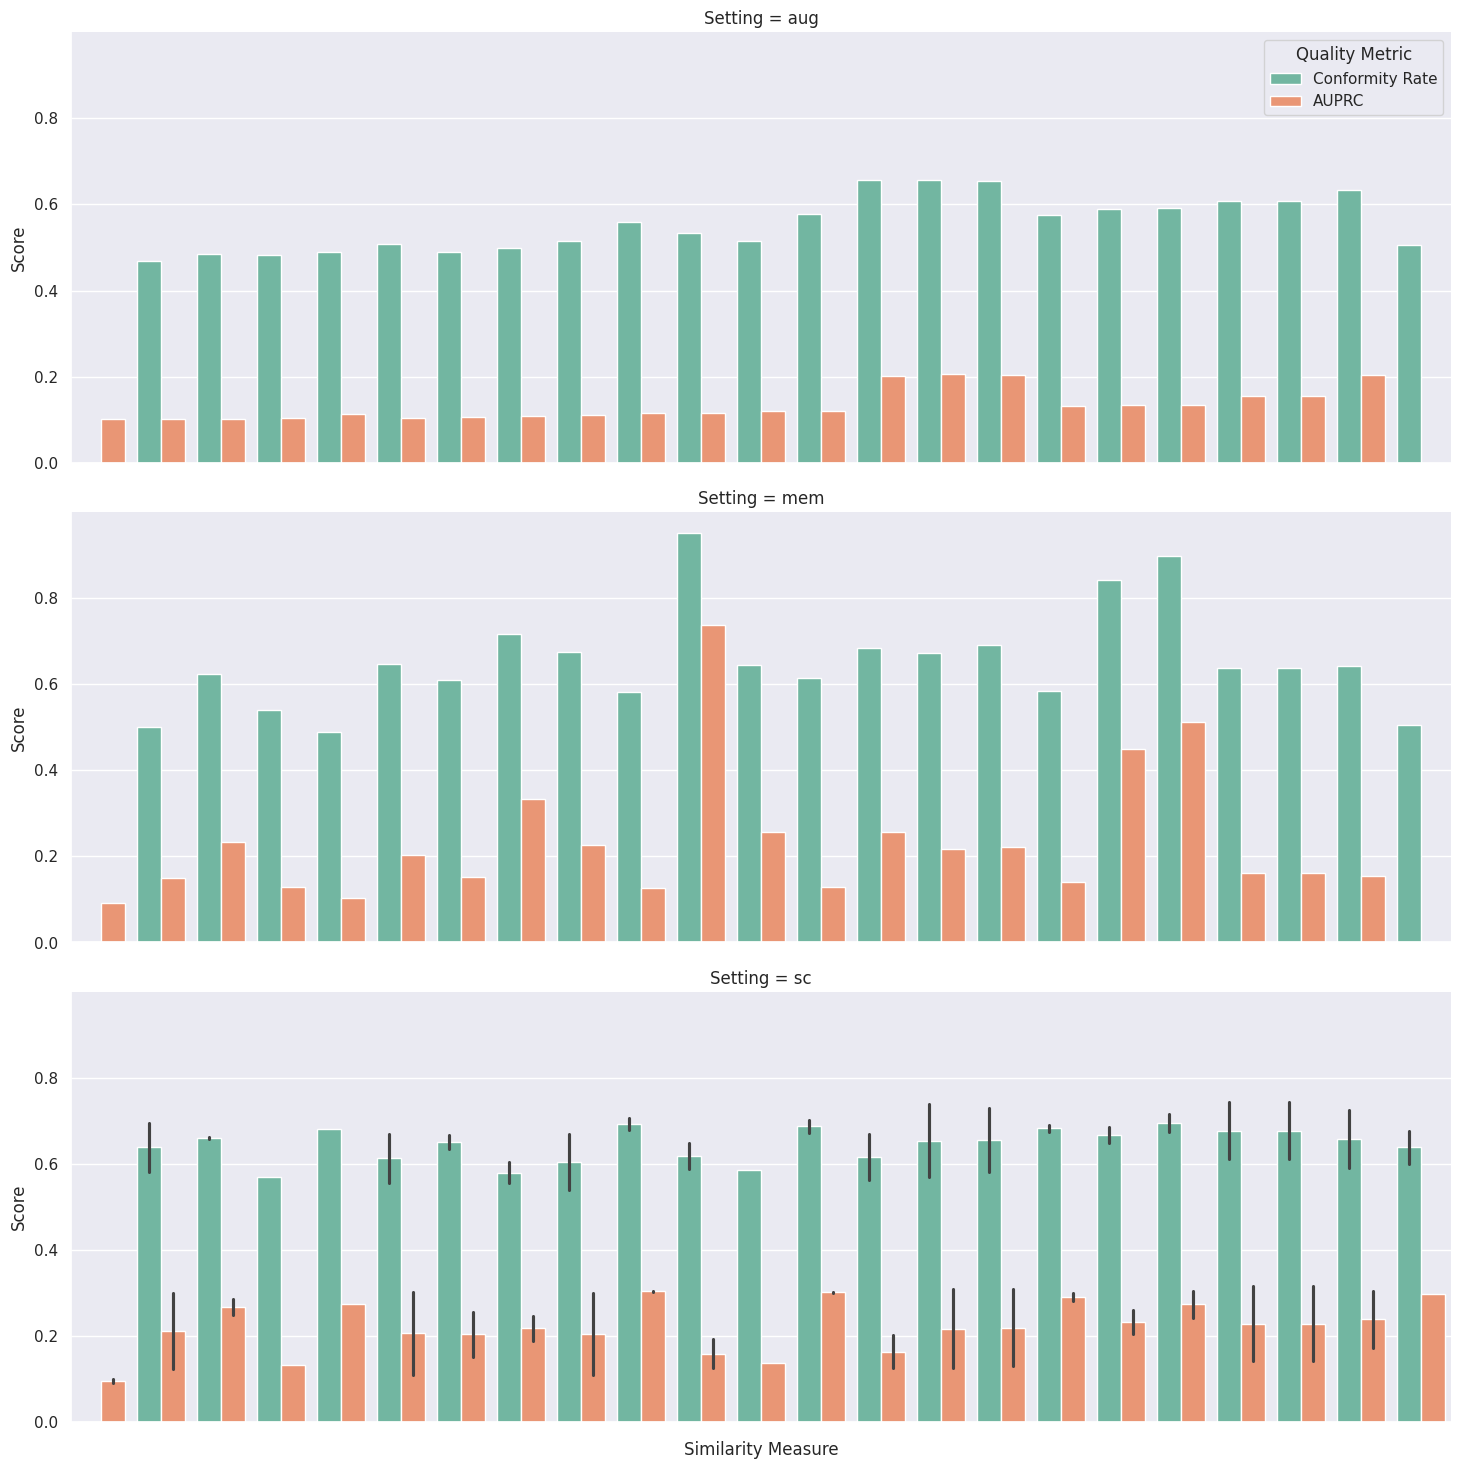

In [3]:
data_plot = data.copy()
data_plot.loc[:, "Quality Metric"] = data_plot.loc[:, "Quality Metric"].map(
    {"Violation Rate": "Conformity Rate", "AUPRC": "AUPRC"}, na_action="ignore"
)
data_plot.loc[data_plot["Quality Metric"] == "Conformity Rate", "Score"] = data_plot.loc[
        data_plot["Quality Metric"] == "Conformity Rate", "Score"
].map(lambda x: 1 - x)
data_sorted = data_plot.sort_values(by=["Score", "Quality Metric"], ascending=True)

sns.set(style="darkgrid")
g = sns.catplot(
    data=data_sorted,
    x="Similarity Measure",
    y="Score",
    hue="Quality Metric",
    row="Setting",
    kind="bar",
    aspect=3,
    palette="Set2",
    legend=True,
    legend_out=False,
)
g.set_xticklabels(rotation=45, ha="right")

In [6]:
# Select score or rank
ycol = "Score" if True else "rank"

ranks = data.groupby(["Setting", "Quality Metric"])["Score"].rank()
data["rank"] = ranks
for qmeasure in data["Quality Metric"].unique():
    print(qmeasure)
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        display(
            data[data["Quality Metric"] == qmeasure]
            .groupby(["Similarity Measure", "Quality Metric", "Setting", "Dataset"])[ycol]
            .agg(["mean", "min", "max"])
            .sort_values(["Setting", "mean"])
        )

Violation Rate


,,,,mean,min,max
Similarity Measure,Quality Metric,Setting,Dataset,,,
CKA,Violation Rate,aug,sst2,0.342889,0.342889,0.342889
SVCCA,Violation Rate,aug,sst2,0.343289,0.343289,0.343289
DistanceCorrelation,Violation Rate,aug,sst2,0.345522,0.345522,0.345522
RSA,Violation Rate,aug,sst2,0.366289,0.366289,0.366289
OrthogonalAngularShapeMetricCentered,Violation Rate,aug,sst2,0.3919,0.3919,0.3919
OrthogonalProcrustesCenteredAndNormalized,Violation Rate,aug,sst2,0.3919,0.3919,0.3919
AlignedCosineSimilarity,Violation Rate,aug,sst2,0.408722,0.408722,0.408722
ProcrustesSizeAndShapeDistance,Violation Rate,aug,sst2,0.411778,0.411778,0.411778
JaccardSimilarity,Violation Rate,aug,sst2,0.422944,0.422944,0.422944


AUPRC


,,,,mean,min,max
Similarity Measure,Quality Metric,Setting,Dataset,,,
Gulp,AUPRC,aug,sst2,0.100955,0.100955,0.100955
RSMNormDifference,AUPRC,aug,sst2,0.101124,0.101124,0.101124
PermutationProcrustes,AUPRC,aug,sst2,0.101906,0.101906,0.101906
EigenspaceOverlapScore,AUPRC,aug,sst2,0.103331,0.103331,0.103331
HardCorrelationMatch,AUPRC,aug,sst2,0.104825,0.104825,0.104825
MagnitudeDifference,AUPRC,aug,sst2,0.106836,0.106836,0.106836
UniformityDifference,AUPRC,aug,sst2,0.107856,0.107856,0.107856
SoftCorrelationMatch,AUPRC,aug,sst2,0.111305,0.111305,0.111305
GeometryScore,AUPRC,aug,sst2,0.11419,0.11419,0.11419


In [5]:
qual_metrics = data["Quality Metric"].unique()
corrs = np.full(shape=(2, len(qual_metrics), len(qual_metrics)), fill_value=np.nan)  # two elems in first dim for pearson and spearman
metric_to_idx = {m: i for i, m in enumerate(qual_metrics)}

for m1, m2 in itertools.combinations(qual_metrics, r=2):
    scores1 = data.loc[data["Quality Metric"] == m1, "Score"].reset_index(drop=True)
    scores2 = data.loc[data["Quality Metric"] == m2, "Score"].reset_index(drop=True)
    if len(scores1) != len(scores2):
        print(f"Unequal length! {m1, m2}")
        continue

    nan_idx = scores1.isna() | scores2.isna()
    vals1 = scores1[~nan_idx].values
    vals2 = scores2[~nan_idx].values
    p = pearsonr(vals1, vals2)
    s = spearmanr(vals1, vals2)

    i = metric_to_idx[m1]
    j = metric_to_idx[m2]
    corrs[0, i, j] = p.statistic
    corrs[0, j, i] = p.statistic
    corrs[1, i, j] = s.statistic
    corrs[1, j, i] = s.statistic

print("Pearson", corrs[0])
print("Spearman", corrs[1])

Pearson [[        nan -0.67489882]
 [-0.67489882         nan]]
Spearman [[        nan -0.94864912]
 [-0.94864912         nan]]


## Comparing different number of groups

In [52]:
import pandas as pd
from pathlib import Path
from scipy.stats import spearmanr, pearsonr
import numpy as np

In [38]:
basepath=Path("/root/similaritybench/experiments/results")
data = []

for setting in ["sc", "mem", "aug"]:
    for dataset in ["mnli", "sst2"]:
        for groups in ["2", "3", "5"]:
            try:
                df = pd.read_csv(basepath / f"{setting}_{dataset}_{groups}_full.csv", index_col=0)
                df["groups"] = groups
                data.append(df)
            except FileNotFoundError as e:
                print(e)

data = pd.concat(data)

[Errno 2] No such file or directory: '/root/similaritybench/experiments/results/sc_mnli_2_full.csv'
[Errno 2] No such file or directory: '/root/similaritybench/experiments/results/sc_sst2_2_full.csv'
[Errno 2] No such file or directory: '/root/similaritybench/experiments/results/mem_mnli_2_full.csv'
[Errno 2] No such file or directory: '/root/similaritybench/experiments/results/mem_sst2_2_full.csv'
[Errno 2] No such file or directory: '/root/similaritybench/experiments/results/aug_mnli_2_full.csv'
[Errno 2] No such file or directory: '/root/similaritybench/experiments/results/aug_sst2_3_full.csv'


In [39]:
data.groupby(["representation_dataset", "groups"])["value"].describe()

count      mean       std       min       25%  \
representation_dataset groups                                                  
mnli_aug_rate0         3        44.0  0.314385  0.119738  0.129333  0.235331   
                       5        44.0  0.259918  0.108473  0.093211  0.179200   
mnli_mem_rate0         3        43.0  0.415710  0.322462  0.000000  0.105667   
                       5        41.0  0.302352  0.148103  0.022200  0.241955   
mnli_sc_rate0354       3        44.0  0.349375  0.191543  0.102667  0.173833   
                       5        44.0  0.295045  0.051474  0.128741  0.273450   
sst2_aug_rate0         2        46.0  0.427751  0.101424  0.304295  0.343592   
                       5        46.0  0.296213  0.166143  0.094973  0.140571   
sst2_mem_rate0         3        46.0  0.389115  0.228313  0.001333  0.249333   
                       5        46.0  0.295268  0.143880  0.048000  0.162086   
sst2_sc_rate0558       3        46.0  0.321349  0.100870  0.138000  0.249325   
                       5        46.0  0.286820  0.130794  0.095687  0.157694   

                                    50%       75%       max  
representation_dataset groups                                
mnli_aug_rate0         3       0.299000  0.378555  0.612388  
                       5       0.247303  0.319450  0.544400  
mnli_mem_rate0         3       0.360667  0.689696  1.000000  
                       5       0.281182  0.350175  0.865350  
mnli_sc_rate0354       3       0.329333  0.559231  0.600157  
                       5       0.302520  0.322322  0.434000  
sst2_aug_rate0         2       0.402472  0.517049  0.625000  
                       5       0.281896  0.441000  0.563600  
sst2_mem_rate0         3       0.365675  0.480327  0.994444  
                       5       0.296200  0.382600  0.737925  
sst2_sc_rate0558       3       0.316333  0.360865  0.554967  
                       5       0.300469  0.397723  0.511600

In [53]:
assert isinstance(data, pd.DataFrame)
for dataset in data.representation_dataset.unique():
    selection = data.loc[data.representation_dataset == dataset]
    pivot = selection.pivot_table(index="similarity_measure", columns=["representation_dataset", "quality_measure", "groups"], values=["value"])
    display(pivot)

    vals_few_groups = pivot.loc[:, ("value", dataset, "AUPRC", selection.groups.min())].values
    vals_more_groups = pivot.loc[:, ("value", dataset, "AUPRC", selection.groups.max())].values
    nan_idx = np.isnan(vals_few_groups) | np.isnan(vals_more_groups)

    print("spearman", spearmanr(vals_few_groups[~nan_idx], vals_more_groups[~nan_idx]))
    print("pearsonr", pearsonr(vals_few_groups[~nan_idx], vals_more_groups[~nan_idx]))


value            \
representation_dataset                    mnli_sc_rate0354             
quality_measure                                      AUPRC             
groups                                                   3         5   
similarity_measure                                                     
AlignedCosineSimilarity                           0.583680  0.305176   
CKA                                               0.585513  0.309160   
ConcentricityDifference                           0.376624  0.193628   
DistanceCorrelation                               0.584432  0.308460   
EigenspaceOverlapScore                            0.568016  0.303966   
Gulp                                              0.563494  0.299563   
HardCorrelationMatch                              0.550509  0.301422   
JaccardSimilarity                                 0.563847  0.301301   
LinearRegression                                  0.456127  0.247071   
MagnitudeDifference                               0.481735  0.256078   
OrthogonalAngularShapeMetricCentered              0.600157  0.317218   
OrthogonalProcrustesCenteredAndNormalized         0.600157  0.317218   
PWCCA                                             0.557810  0.298910   
PermutationProcrustes                             0.519845  0.286305   
ProcrustesSizeAndShapeDistance                    0.535416  0.260620   
RSA                                               0.578040  0.304199   
RSMNormDifference                                 0.282852  0.128741   
RankSimilarity                                    0.576332  0.303617   
SVCCA                                             0.420625  0.202846   
SecondOrderCosineSimilarity                       0.588650  0.300228   
SoftCorrelationMatch                              0.551177  0.301250   
UniformityDifference                              0.404331  0.189129   

                                                                   
representation_dataset                                             
quality_measure                           violation_rate           
groups                                                 3        5  
similarity_measure                                                 
AlignedCosineSimilarity                         0.111333  0.28340  
CKA                                             0.120000  0.26120  
ConcentricityDifference                         0.250667  0.35140  
DistanceCorrelation                             0.124000  0.27060  
EigenspaceOverlapScore                          0.149333  0.29060  
Gulp                                            0.159333  0.30400  
HardCorrelationMatch                            0.182667  0.32980  
JaccardSimilarity                               0.186667  0.32820  
LinearRegression                                0.154000  0.28680  
MagnitudeDifference                             0.188000  0.33200  
OrthogonalAngularShapeMetricCentered            0.102667  0.25720  
OrthogonalProcrustesCenteredAndNormalized       0.102667  0.25720  
PWCCA                                           0.141789  0.32449  
PermutationProcrustes                           0.178667  0.34220  
ProcrustesSizeAndShapeDistance                  0.134000  0.31380  
RSA                                             0.126667  0.27440  
RSMNormDifference                               0.344667  0.43400  
RankSimilarity                                  0.182667  0.32160  
SVCCA                                           0.224000  0.33080  
SecondOrderCosineSimilarity                     0.181333  0.32600  
SoftCorrelationMatch                            0.184000  0.33020  
UniformityDifference                            0.314000  0.39600

spearman SignificanceResult(statistic=0.9265536723163843, pvalue=6.073508091622443e-10)
pearsonr PearsonRResult(statistic=0.9845485488403807, pvalue=1.3135573594798816e-16)


value            \
representation_dataset                    sst2_sc_rate0558             
quality_measure                                      AUPRC             
groups                                                   3         5   
similarity_measure                                                     
AlignedCosineSimilarity                           0.451286  0.227898   
CKA                                               0.263007  0.111266   
ConcentricityDifference                           0.255497  0.143230   
DistanceCorrelation                               0.263864  0.112291   
EigenspaceOverlapScore                            0.245844  0.111104   
Gulp                                              0.248650  0.122363   
HardCorrelationMatch                              0.233600  0.100631   
IMDScore                                          0.335446  0.145998   
JaccardSimilarity                                 0.554967  0.294080   
LinearRegression                                  0.368711  0.181947   
MagnitudeDifference                               0.345950  0.180460   
OrthogonalAngularShapeMetricCentered              0.308066  0.128821   
OrthogonalProcrustesCenteredAndNormalized         0.308066  0.128821   
PWCCA                                             0.353452  0.182929   
PermutationProcrustes                             0.457232  0.229726   
ProcrustesSizeAndShapeDistance                    0.432581  0.218950   
RSA                                               0.359460  0.168234   
RSMNormDifference                                 0.343896  0.154181   
RankSimilarity                                    0.554298  0.299937   
SVCCA                                             0.251352  0.106853   
SecondOrderCosineSimilarity                       0.553378  0.295250   
SoftCorrelationMatch                              0.220255  0.095687   
UniformityDifference                              0.345722  0.208690   

                                                                    
representation_dataset                                              
quality_measure                           violation_rate            
groups                                                 3         5  
similarity_measure                                                  
AlignedCosineSimilarity                         0.206667  0.363600  
CKA                                             0.334667  0.431400  
ConcentricityDifference                         0.333333  0.403400  
DistanceCorrelation                             0.324000  0.424200  
EigenspaceOverlapScore                          0.413333  0.479800  
Gulp                                            0.352667  0.439600  
HardCorrelationMatch                            0.361333  0.459000  
IMDScore                                        0.280000  0.395200  
JaccardSimilarity                               0.144667  0.318200  
LinearRegression                                0.262667  0.387000  
MagnitudeDifference                             0.268667  0.337000  
OrthogonalAngularShapeMetricCentered            0.233333  0.371600  
OrthogonalProcrustesCenteredAndNormalized       0.233333  0.371600  
PWCCA                                           0.305463  0.398564  
PermutationProcrustes                           0.222000  0.363000  
ProcrustesSizeAndShapeDistance                  0.229333  0.372000  
RSA                                             0.318667  0.421000  
RSMNormDifference                               0.314000  0.432000  
RankSimilarity                                  0.138000  0.301000  
SVCCA                                           0.384000  0.458000  
SecondOrderCosineSimilarity                     0.161333  0.320800  
SoftCorrelationMatch                            0.452000  0.511600  
UniformityDifference                            0.454000  0.484800

spearman SignificanceResult(statistic=0.9624320316361837, pvalue=2.294723258247293e-13)
pearsonr PearsonRResult(statistic=0.9768419817889419, pvalue=1.5205697494115638e-15)


value            \
representation_dataset                    mnli_mem_rate0             
quality_measure                                    AUPRC             
groups                                                 3         5   
similarity_measure                                                   
AlignedCosineSimilarity                         1.000000  0.523803   
CKA                                             0.752692  0.347397   
ConcentricityDifference                         1.000000  0.865350   
DistanceCorrelation                             0.750119  0.350175   
EigenspaceOverlapScore                          0.616949  0.323633   
Gulp                                            0.611046  0.312790   
HardCorrelationMatch                            0.749357  0.331813   
JaccardSimilarity                               0.685921  0.309468   
LinearRegression                                0.569724  0.241955   
MagnitudeDifference                             0.331188  0.155942   
OrthogonalAngularShapeMetricCentered            0.900161  0.367838   
OrthogonalProcrustesCenteredAndNormalized       0.900161  0.367838   
PWCCA                                           0.649802       NaN   
PermutationProcrustes                           0.436244  0.254178   
ProcrustesSizeAndShapeDistance                  0.984211  0.519384   
RSA                                             0.458619  0.162850   
RSMNormDifference                               0.523810  0.232107   
RankSimilarity                                  0.627474  0.256818   
SVCCA                                           0.693471  0.281182   
SecondOrderCosineSimilarity                     0.386772  0.168276   
SoftCorrelationMatch                            0.753350  0.341997   
UniformityDifference                            0.764026  0.549447   

                                                                  
representation_dataset                                            
quality_measure                           violation_rate          
groups                                                 3       5  
similarity_measure                                                
AlignedCosineSimilarity                         0.000000  0.1074  
CKA                                             0.102667  0.2430  
ConcentricityDifference                         0.000000  0.0222  
DistanceCorrelation                             0.105333  0.2556  
EigenspaceOverlapScore                          0.122000  0.2468  
Gulp                                            0.106000  0.2558  
HardCorrelationMatch                            0.100000  0.2686  
JaccardSimilarity                               0.160667  0.3000  
LinearRegression                                0.148000  0.2676  
MagnitudeDifference                             0.249333  0.3650  
OrthogonalAngularShapeMetricCentered            0.016667  0.1620  
OrthogonalProcrustesCenteredAndNormalized       0.016667  0.1620  
PWCCA                                           0.087770     NaN  
PermutationProcrustes                           0.317333  0.4064  
ProcrustesSizeAndShapeDistance                  0.006000  0.1322  
RSA                                             0.360667  0.3984  
RSMNormDifference                               0.333333  0.5506  
RankSimilarity                                  0.183333  0.3154  
SVCCA                                           0.144000  0.2888  
SecondOrderCosineSimilarity                          NaN     NaN  
SoftCorrelationMatch                            0.084000  0.2496  
UniformityDifference                            0.086667  0.1348

spearman SignificanceResult(statistic=0.9496263094931495, pvalue=5.041340359857062e-11)
pearsonr PearsonRResult(statistic=0.8118185318679093, pvalue=7.903170059917519e-06)


value            \
representation_dataset                    sst2_mem_rate0             
quality_measure                                    AUPRC             
groups                                                 3         5   
similarity_measure                                                   
AlignedCosineSimilarity                         0.994444  0.512842   
CKA                                             0.588351  0.218001   
ConcentricityDifference                         0.957179  0.737925   
DistanceCorrelation                             0.588999  0.221519   
EigenspaceOverlapScore                          0.362520  0.128683   
Gulp                                            0.279832  0.149911   
HardCorrelationMatch                            0.442496  0.202568   
IMDScore                                        0.474434  0.256906   
JaccardSimilarity                               0.347728  0.129887   
LinearRegression                                0.404378  0.248898   
MagnitudeDifference                             0.381966  0.151870   
OrthogonalAngularShapeMetricCentered            0.494995  0.162086   
OrthogonalProcrustesCenteredAndNormalized       0.494995  0.162086   
PWCCA                                           0.266679  0.169976   
PermutationProcrustes                           0.451598  0.232547   
ProcrustesSizeAndShapeDistance                  0.856062  0.448783   
RSA                                             0.479465  0.154634   
RSMNormDifference                               0.908622  0.507005   
RankSimilarity                                  0.343003  0.127127   
SVCCA                                           0.642043  0.256518   
SecondOrderCosineSimilarity                     0.368683  0.140627   
SoftCorrelationMatch                            0.480614  0.226598   
UniformityDifference                            0.596499  0.333816   

                                                                    
representation_dataset                                              
quality_measure                           violation_rate            
groups                                                 3         5  
similarity_measure                                                  
AlignedCosineSimilarity                         0.001333  0.101800  
CKA                                             0.222000  0.326800  
ConcentricityDifference                         0.014000  0.048000  
DistanceCorrelation                             0.198667  0.308200  
EigenspaceOverlapScore                          0.398667  0.459400  
Gulp                                            0.455333  0.498600  
HardCorrelationMatch                            0.234000  0.354000  
IMDScore                                        0.208667  0.356600  
JaccardSimilarity                               0.308000  0.384800  
LinearRegression                                0.434667  0.477400  
MagnitudeDifference                             0.307333  0.390000  
OrthogonalAngularShapeMetricCentered            0.249333  0.362600  
OrthogonalProcrustesCenteredAndNormalized       0.249333  0.362600  
PWCCA                                           0.520370  0.495704  
PermutationProcrustes                           0.269333  0.376000  
ProcrustesSizeAndShapeDistance                  0.045333  0.159200  
RSA                                             0.266667  0.358400  
RSMNormDifference                               0.030667  0.121800  
RankSimilarity                                  0.373333  0.418000  
SVCCA                                           0.204667  0.316400  
SecondOrderCosineSimilarity                     0.362667  0.415200  
SoftCorrelationMatch                            0.197333  0.325800  
UniformityDifference                            0.142000  0.284200

spearman SignificanceResult(statistic=0.8082056351952547, pvalue=3.0865423717100886e-06)
pearsonr PearsonRResult(statistic=0.9060915282298719, pvalue=2.687619171978919e-09)


value            \
representation_dataset                    mnli_aug_rate0             
quality_measure                                    AUPRC             
groups                                                 3         5   
similarity_measure                                                   
AlignedCosineSimilarity                         0.354384  0.183733   
CKA                                             0.478847  0.291237   
ConcentricityDifference                         0.284270  0.156790   
DistanceCorrelation                             0.452537  0.287191   
EigenspaceOverlapScore                          0.266887  0.156791   
Gulp                                            0.255820  0.143141   
HardCorrelationMatch                            0.244418  0.125508   
JaccardSimilarity                               0.349285  0.223945   
LinearRegression                                0.238442  0.143762   
MagnitudeDifference                             0.163811  0.102424   
OrthogonalAngularShapeMetricCentered            0.378555  0.205825   
OrthogonalProcrustesCenteredAndNormalized       0.378555  0.205825   
PWCCA                                           0.182013  0.115612   
PermutationProcrustes                           0.176657  0.093211   
ProcrustesSizeAndShapeDistance                  0.318131  0.154500   
RSA                                             0.486593  0.299872   
RSMNormDifference                               0.354401  0.216042   
RankSimilarity                                  0.334787  0.216713   
SVCCA                                           0.437091  0.241232   
SecondOrderCosineSimilarity                     0.440463  0.291765   
SoftCorrelationMatch                            0.277366  0.141624   
UniformityDifference                            0.612388  0.253374   

                                                                    
representation_dataset                                              
quality_measure                           violation_rate            
groups                                                 3         5  
similarity_measure                                                  
AlignedCosineSimilarity                         0.200667  0.262800  
CKA                                             0.129333  0.179800  
ConcentricityDifference                         0.393333  0.425800  
DistanceCorrelation                             0.150667  0.184000  
EigenspaceOverlapScore                          0.288667  0.282200  
Gulp                                            0.306667  0.317800  
HardCorrelationMatch                            0.330667  0.367600  
JaccardSimilarity                               0.262667  0.282800  
LinearRegression                                0.342000  0.355000  
MagnitudeDifference                             0.546000  0.544400  
OrthogonalAngularShapeMetricCentered            0.164667  0.226200  
OrthogonalProcrustesCenteredAndNormalized       0.164667  0.226200  
PWCCA                                           0.512566  0.484669  
PermutationProcrustes                           0.511333  0.519200  
ProcrustesSizeAndShapeDistance                  0.267333  0.324400  
RSA                                             0.138000  0.177400  
RSMNormDifference                               0.336000  0.385800  
RankSimilarity                                  0.291333  0.303400  
SVCCA                                           0.226000  0.293000  
SecondOrderCosineSimilarity                     0.364667  0.348200  
SoftCorrelationMatch                            0.276667  0.327800  
UniformityDifference                            0.163333  0.367800

spearman SignificanceResult(statistic=0.9355932203389831, pvalue=1.6966676457835867e-10)
pearsonr PearsonRResult(statistic=0.9087186959545943, pvalue=4.951402362766112e-09)


value            \
representation_dataset                    sst2_aug_rate0             
quality_measure                                    AUPRC             
groups                                                 2         5   
similarity_measure                                                   
AlignedCosineSimilarity                         0.452271  0.145193   
CKA                                             0.607224  0.210588   
ConcentricityDifference                         0.319866  0.150009   
DistanceCorrelation                             0.616045  0.208086   
EigenspaceOverlapScore                          0.304462  0.094973   
Gulp                                            0.328136  0.101066   
HardCorrelationMatch                            0.344322  0.095293   
IMDScore                                        0.304295  0.117505   
JaccardSimilarity                               0.391266  0.120358   
LinearRegression                                0.401085  0.142557   
MagnitudeDifference                             0.305794  0.122135   
OrthogonalAngularShapeMetricCentered            0.519399  0.151845   
OrthogonalProcrustesCenteredAndNormalized       0.519399  0.151868   
PWCCA                                           0.350000  0.109886   
PermutationProcrustes                           0.310504  0.095130   
ProcrustesSizeAndShapeDistance                  0.432921  0.149656   
RSA                                             0.609455  0.213393   
RSMNormDifference                               0.343349  0.169502   
RankSimilarity                                  0.355724  0.118355   
SVCCA                                           0.606980  0.211561   
SecondOrderCosineSimilarity                     0.403859  0.139909   
SoftCorrelationMatch                            0.411472  0.111638   
UniformityDifference                            0.327700  0.133846   

                                                                    
representation_dataset                                              
quality_measure                           violation_rate            
groups                                                 2         5  
similarity_measure                                                  
AlignedCosineSimilarity                            0.370  0.398200  
CKA                                                0.316  0.359800  
ConcentricityDifference                            0.490  0.381600  
DistanceCorrelation                                0.314  0.363800  
EigenspaceOverlapScore                             0.510  0.541200  
Gulp                                               0.528  0.563600  
HardCorrelationMatch                               0.508  0.538800  
IMDScore                                           0.532  0.523800  
JaccardSimilarity                                  0.388  0.446600  
LinearRegression                                   0.454  0.483200  
MagnitudeDifference                                0.538  0.490000  
OrthogonalAngularShapeMetricCentered               0.376  0.412200  
OrthogonalProcrustesCenteredAndNormalized          0.376  0.412000  
PWCCA                                              0.625  0.522854  
PermutationProcrustes                              0.562  0.547600  
ProcrustesSizeAndShapeDistance                     0.360  0.387000  
RSA                                                0.316  0.379000  
RSMNormDifference                                  0.416  0.350400  
RankSimilarity                                     0.434  0.456800  
SVCCA                                              0.316  0.356400  
SecondOrderCosineSimilarity                        0.360  0.424200  
SoftCorrelationMatch                               0.478  0.533400  
UniformityDifference                               0.544  0.489000

spearman SignificanceResult(statistic=0.7249814898863942, pvalue=9.102032947959434e-05)
pearsonr PearsonRResult(statistic=0.8615738713418717, pvalue=1.289906113383553e-07)


## Duplicate Index Entries

In [11]:
df = pd.read_parquet("/root/similaritybench/experiments/results/nlp_shortcuts_sst2.parquet")

In [28]:
len(df[df.index.value_counts()==2].reset_index().groupby("index")["metric_value"].value_counts())
# df.loc["Shortcut_10__BERT-L__sst2_sc_rate10__0__sst2_sc_rate0558__12___Shortcut_10__BERT-L__sst2_sc_rate10__3__sst2_sc_rate0558__12___PWCCA"]

/tmp/ipykernel_27220/3588452796.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df.index.value_counts()==2].reset_index().groupby("index")["metric_value"].value_counts())


60

In [37]:
new_df = df.copy()
for index in df[df.index.value_counts()==2].index:
    # print(index)
    new_df = new_df.loc[~((new_df.index == index) & new_df.metric_value.isna())]

print(new_df.index.value_counts().max())
print(len(new_df) - len(df))

# new_df.to_parquet("/root/similaritybench/experiments/results/nlp_shortcuts_sst2.parquet")

/tmp/ipykernel_27220/2183696635.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  for index in df[df.index.value_counts()==2].index:


1
-60
